In [1]:
import tensorflow as tf

# Load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#Normalizing
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

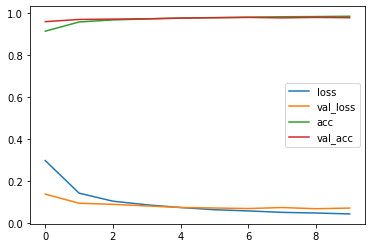

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# Plot accuracy per iteration
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print("               Predicted Label")
print(cm)

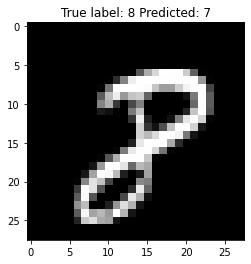

In [18]:
# Show some misclassified examples
import numpy as np
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));